In [1]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum
from scipy.io import loadmat, savemat 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

C:\Users\tkalra\AppData\Local\Continuum\anaconda3\lib\site-packages\stingray\crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [2]:
# 1. Read a time stacked image.. with vertical axis as distance and horizontal axis of time - currently done manually 
matstack = loadmat('bispectra_vspec_FI.mat') #,'f_FI','fv_post_FI','fv_neg_FI')
                  
#xx = matstack['f_FI']
#times=1/xx 
dt=0.015625  ; # bandwidth

#freq = 1 #Hz
exposure = 1  # seconds
times = np.arange(0, exposure, dt)  # seconds
times=matstack['f_FI']
counts= matstack['fv_neg_FI']
print(times)


times=np.squeeze(times)
counts=np.squeeze(counts)
print(np.size(times))

#print(np.type(counts))
#Sv  = matstack['Sv_subset']

[[0.0078125]
 [0.0234375]
 [0.0390625]
 [0.0546875]
 [0.0703125]
 [0.0859375]
 [0.1015625]
 [0.1171875]
 [0.1328125]
 [0.1484375]
 [0.1640625]
 [0.1796875]
 [0.1953125]
 [0.2109375]
 [0.2265625]
 [0.2421875]
 [0.2578125]
 [0.2734375]
 [0.2890625]
 [0.3046875]
 [0.3203125]
 [0.3359375]
 [0.3515625]
 [0.3671875]
 [0.3828125]
 [0.3984375]
 [0.4140625]
 [0.4296875]
 [0.4453125]
 [0.4609375]
 [0.4765625]
 [0.4921875]
 [0.5078125]
 [0.5234375]
 [0.5390625]
 [0.5546875]
 [0.5703125]
 [0.5859375]
 [0.6015625]
 [0.6171875]
 [0.6328125]
 [0.6484375]
 [0.6640625]
 [0.6796875]
 [0.6953125]
 [0.7109375]
 [0.7265625]
 [0.7421875]
 [0.7578125]
 [0.7734375]
 [0.7890625]
 [0.8046875]
 [0.8203125]
 [0.8359375]
 [0.8515625]
 [0.8671875]
 [0.8828125]
 [0.8984375]
 [0.9140625]
 [0.9296875]
 [0.9453125]
 [0.9609375]
 [0.9765625]
 [0.9921875]]
64


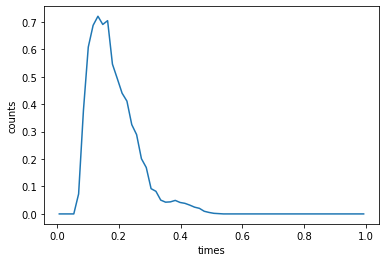

<Figure size 432x288 with 0 Axes>

In [14]:

#times = np.arange(1,11)
#counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])


lc = lightcurve.Lightcurve(times,counts)
print(lc)
lc.plot(labels=['times','counts'])
p.savefig('FI_negative_input.png')
#lc.counts

In [4]:
window = 'hanning'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')
#bs = Bispectrum(lc)


In [5]:
bs.freq


array([-32.  , -30.72, -29.44, -28.16, -26.88, -25.6 , -24.32, -23.04,
       -21.76, -20.48, -19.2 , -17.92, -16.64, -15.36, -14.08, -12.8 ,
       -11.52, -10.24,  -8.96,  -7.68,  -6.4 ,  -5.12,  -3.84,  -2.56,
        -1.28,   0.  ,   1.28,   2.56,   3.84,   5.12,   6.4 ,   7.68,
         8.96,  10.24,  11.52,  12.8 ,  14.08,  15.36,  16.64,  17.92,
        19.2 ,  20.48,  21.76,  23.04,  24.32,  25.6 ,  26.88,  28.16,
        29.44,  30.72,  32.  ])

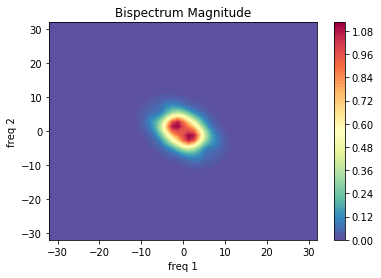

In [6]:
p = bs.plot_mag()
p.show()

(51, 51)
0.0035362910558925952


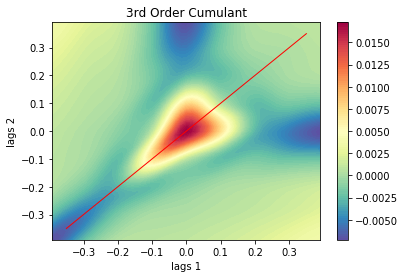

In [13]:
p = bs.plot_cum3()
p.plot([-0.35,0.35],[-0.35,0.35], 'red', linewidth=1)
print(np.shape(bs.cum3))
print(bs.cum3[50][0])
p.savefig('FI_negative_3rdorder.png')

In [8]:
# find the sum of elements under the principal diagonal
# along principal diagonal 
A=bs.cum3
upper_sum = np.triu(A).sum()-np.trace(A)
lower_sum = np.tril(A).sum()-np.trace(A)
print(lower_sum)

-0.18275204937181808


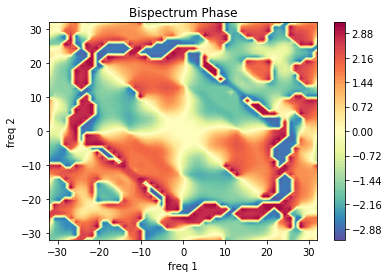

In [9]:
p = bs.plot_phase()


In [10]:
bi_mag=bs.bispec_mag[1]
sum_bispec_mag=np.sum(bi_mag)
print(np.size(bi_mag))

51


In [11]:
print(sum_bispec_mag)

0.017883277015910467


In [12]:
cum_bs=(bs.cum3)
sum_cum_bs=np.sum(cum_bs)
print(sum_cum_bs)
print(np.size(bs.cum3))

-0.2791916417248652
2601
